In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install

## PV-RCNN

In [ ]:
%%capture
!pip install spconv-cu102
# !git clone https://github.com/open-mmlab/OpenPCDet.git
%cd /content/drive/MyDrive/Masters/SDC/Project/OpenPCDet/
!pip install -r requirements.txt 
!python setup.py develop

In [ ]:
from pcdet.datasets import build_dataloader
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.models import build_network
import torch  
from torch import nn

from pcdet.utils import common_utils

%cd tools
cfg_from_yaml_file("cfgs/kitti_models/pv_rcnn.yaml", cfg)
%cd ..
dist_train = False
workers = 4
data_set, data_loader, data_sampler = build_dataloader(
        dataset_cfg=cfg.DATA_CONFIG,
        class_names=cfg.CLASS_NAMES,
        batch_size=24,
        dist=dist_train, workers=workers,
        # logger=logger,
        training=False,
        merge_all_iters_to_one_epoch=False,
        total_epochs=20
    )
pvmodel = build_network(model_cfg=cfg.MODEL, num_class=3, dataset=data_set)

ckptpath = "../Models/pv_rcnn_8369.pth"
logger = common_utils.create_logger()
pvmodel.load_params_from_file(filename=ckptpath, logger=logger, to_cpu=True)
pvmodel.cuda()
pvmodel.eval()

/content/drive/MyDrive/Masters/SDC/Project/OpenPCDet/tools
/content/drive/MyDrive/Masters/SDC/Project/OpenPCDet


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2022-02-05 10:47:45,678   INFO  ==> Loading parameters from checkpoint ../Models/pv_rcnn_8369.pth to CPU
2022-02-05 10:47:47,256   INFO  ==> Done (loaded 367/367)


PVRCNN(
  (vfe): MeanVFE()
  (backbone_3d): VoxelBackBone8x(
    (conv_input): SparseSequential(
      (0): SubMConv3d(4, 16, kernel_size=[3, 3, 3], stride=[1, 1, 1], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicitGemm)
      (1): BatchNorm1d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (conv1): SparseSequential(
      (0): SparseSequential(
        (0): SubMConv3d(16, 16, kernel_size=[3, 3, 3], stride=[1, 1, 1], padding=[0, 0, 0], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicitGemm)
        (1): BatchNorm1d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (conv2): SparseSequential(
      (0): SparseSequential(
        (0): SparseConv3d(16, 32, kernel_size=[3, 3, 3], stride=[2, 2, 2], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicit

In [ ]:
help(pvmodel)

Help on PVRCNN in module pcdet.models.detectors.pv_rcnn object:

class PVRCNN(pcdet.models.detectors.detector3d_template.Detector3DTemplate)
 |  PVRCNN(model_cfg, num_class, dataset)
 |  
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  


In [ ]:
from torch import nn
p1mod = nn.Sequential(*list(pvmodel.children())[:-7])
# p2mod = nn.Sequential(*list(pvmodel.children())[1:2])
p2mod = list(pvmodel.children())[1]
p3mod = nn.Sequential(*list(p2mod.children())[:-3])
p3mod

Sequential(
  (0): SparseSequential(
    (0): SubMConv3d(4, 16, kernel_size=[3, 3, 3], stride=[1, 1, 1], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicitGemm)
    (1): BatchNorm1d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (1): SparseSequential(
    (0): SparseSequential(
      (0): SubMConv3d(16, 16, kernel_size=[3, 3, 3], stride=[1, 1, 1], padding=[0, 0, 0], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicitGemm)
      (1): BatchNorm1d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (2): SparseSequential(
    (0): SparseSequential(
      (0): SparseConv3d(16, 32, kernel_size=[3, 3, 3], stride=[2, 2, 2], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], bias=False, algo=ConvAlgo.MaskImplicitGemm)
      (1): BatchNorm1d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True

In [ ]:
pvmodel

## Cascaded RCNN

In [ ]:
%cd ..

/content/drive/MyDrive/Masters/SDC/Project


In [ ]:
%%capture
!pip install mmcv-full
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .
# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0
# Install tree
!apt-get -q install tree

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

1.10.0+cu111 True
2.20.0
11.1
GCC 7.5


In [ ]:
pwd

'/content/drive/MyDrive/Masters/SDC/Project/mmdetection'

In [ ]:
# !mkdir checkpoints
# %cd checkpoints
# !wget -c https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_20e_coco/cascade_rcnn_x101_64x4d_fpn_20e_coco_20200509_224357-051557b1.pth
#       # -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
# %cd ..

In [ ]:
# Choose to use a config and initialize the detector
config = 'configs/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_20e_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/cascade_rcnn_x101_64x4d_fpn_20e_coco_20200509_224357-051557b1.pth'
# initialize the detector
cmodel = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: checkpoints/cascade_rcnn_x101_64x4d_fpn_20e_coco_20200509_224357-051557b1.pth


/content/drive/MyDrive/Masters/SDC/Project/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


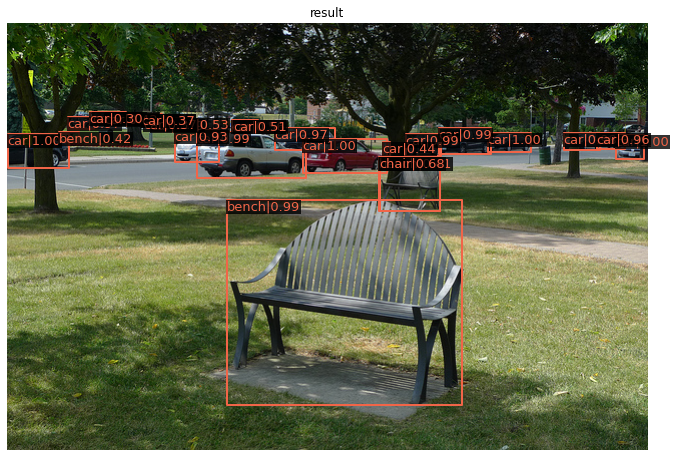

In [ ]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(cmodel, img)
# Let's plot the result
show_result_pyplot(cmodel, img, result, score_thr=0.3)

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.png'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.png', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [ ]:
pwd

'/content/drive/MyDrive/Masters/SDC/Project/mmdetection'

In [ ]:
from mmcv import Config
cfg = Config.fromfile('/content/drive/MyDrive/Masters/SDC/Project/mmdetection/configs/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_20e_coco.py')
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = '../data/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = '../data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = '../data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head[0].num_classes = 3
cfg.model.roi_head.bbox_head[1].num_classes = 3
cfg.model.roi_head.bbox_head[2].num_classes = 3
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '/content/drive/MyDrive/Masters/SDC/Project/Models/epoch_2.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.lr_config.policy = "Step"
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# cfg.custom_hooks = cfg.custom_hooks[0]

# We can initialize the logger for training and have a look
# at the final config used for training
cfg.runner.max_epochs = 2
print(f'Config:\n{cfg.pretty_text}')
# print(cfg.custom_hooks[0])


Config:
model = dict(
    type='CascadeRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_64x4d'),
        groups=64,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dic

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
# datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
# model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
model.CLASSES = ('Car', 'Pedestrian', 'Cyclist')

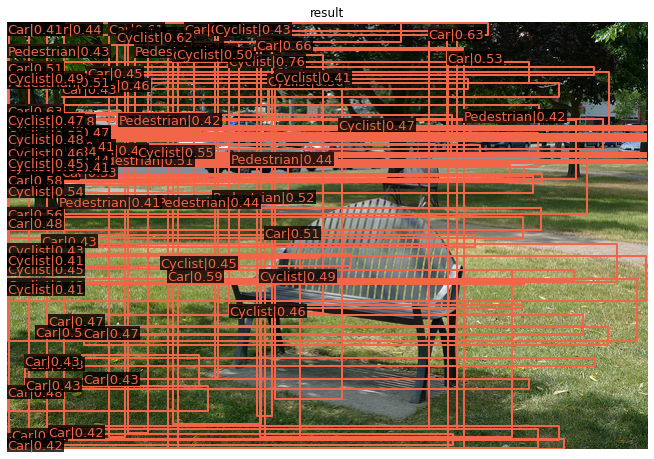

In [ ]:
img = mmcv.imread('demo/demo.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)


In [ ]:
help(cmodel)

Help on CascadeRCNN in module mmdet.models.detectors.cascade_rcnn object:

class CascadeRCNN(mmdet.models.detectors.two_stage.TwoStageDetector)
 |  CascadeRCNN(backbone, neck=None, rpn_head=None, roi_head=None, train_cfg=None, test_cfg=None, pretrained=None, init_cfg=None)
 |  
 |  Implementation of `Cascade R-CNN: Delving into High Quality Object
 |  Detection <https://arxiv.org/abs/1906.09756>`_
 |  
 |  Method resolution order:
 |      CascadeRCNN
 |      mmdet.models.detectors.two_stage.TwoStageDetector
 |      mmdet.models.detectors.base.BaseDetector
 |      mmcv.runner.base_module.BaseModule
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, backbone, neck=None, rpn_head=None, roi_head=None, train_cfg=None, test_cfg=None, pretrained=None, init_cfg=None)
 |      Initialize BaseModule, inherited from `torch.nn.Module`
 |  
 |  show_result(self, data, result, **kwargs)
 |      Show prediction results of the detector.

In [ ]:
cmodel.children()

<generator object Module.children at 0x7fe0e84da850>

In [ ]:
nn.Sequential(*list(cmodel.children()))

Sequential(
  (0): ResNeXt(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

# Modules

## problems

In [ ]:
Cv = 
Cp = 


## Parameter Feature Generating

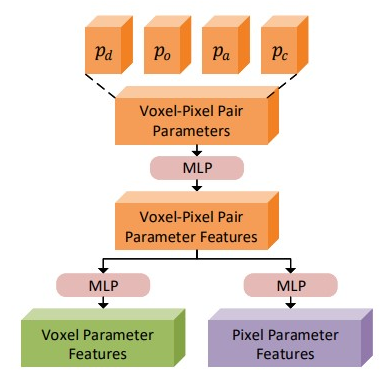

In [ ]:
class PFG(nn.Module):
    def __init__(self):
        super(PFG, self).__init__()
        self.m = nn.Linear(4, 16)
        self.mv = nn.Linear(16,Cv)  # Cv stands for the number of channels for a voxel
        self.mp = nn.Linear(16,Cp)  # Cp stands for the number of channels for a pixel
        
    def forward(self, pd, po, pa, pc):
        # voxel-pixel pair parameter
        p = [pd, po, pa, pc] 
        # voxel-pixel pair parameter features
        p_dash = self.m(p)
        # voxel parameter features and pixel parameter features
        pv = self.mv(p_dash)
        pp = self.mp(p_dash)
        return pv, pp, p_dash
 

## Parameter-Based Weighting

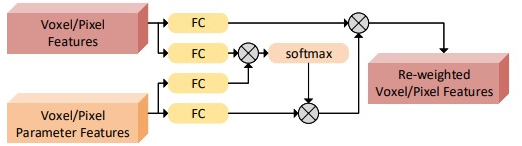

In [ ]:
class PBW(nn.Module):
    def __init__(self):
        super(PBW, self).__init__()
        self.Bv1 = nn.Linear(Cv, Cv)
        self.Bv2 = nn.Linear(Cv, Cv)
        self.Pv1 = nn.Linear(Cv, Cv)
        self.Pv2 = nn.Linear(Cv, Cv)
        self.sv = nn.Softmax()
        self.Bp1 = nn.Linear(Cp, Cp)
        self.Bp2 = nn.Linear(Cp, Cp)
        self.Pp1 = nn.Linear(Cp, Cp)
        self.Pp2 = nn.Linear(Cp, Cp)
        self.sp = nn.Softmax()
    def forward(self, bv, bp, pv, pp):
#       Features of a voxel coming from the LiDAR feature map are expressed by bv 
#       features of a pixel coming from the camera feature map are symbolized by bp
#       The corresponding voxel parameter feature vector coming from the PFG is represented as pv
#       The corresponding pixel parameter feature vector coming from the PFG is represented as pp
        bv_dash = self.sv(self.Bv1(bv)* self.Pv1(pv))*self.Pv2(pv)*self.Bv2(bv)
        bp_dash = self.sp(self.Bp1(bp)* self.Pp1(pp))*self.Pp2(pp)*self.Bp2(bp)
        return bv_dash, bp_dash


## Voxel-Pixel Fusion

In [ ]:
class VPF(nn.Module):
    def __init__(self):
        super(VPF, self).__init__()
        self.Bv3 = nn.Linear(Cv, Cv)
        self.Bv4 = nn.Linear(Cv, Cv)
        self.Bv5 = nn.Linear(Cv, Cv)
        self.Bp3 = nn.Linear(Cp, Cp)
        self.Bp4 = nn.Linear(Cp, Cp)
        self.Bp5 = nn.Linear(Cp, Cp)
        self.P = nn.Linear(16, 16)
        self.sp = nn.Softmax()
        self.sv = nn.Softmax()
        self.S = nn.Linear(Cv+Cp+16, Cv+Cp+16)
        self.Sp = nn.Linear(Cv+Cp+16, Cp)
        self.Sv = nn.Linear(Cv+Cp+16, Cv)

    def forward(self, bv_dash, bp_dash, p_dash):
        bvt = self.sv(self.Bv3(bv_dash)*Bp3(bp_dash))*(Bv5(bv_dash))
        bpt = self.sp(self.Bv4(bv_dash)*Bp4(bp_dash))*(Bp5(bp_dash))
        pt = self.P(p_dash)
        s = self.S(torch.cat((bvt,bpt,pt),0))
        bv_2d = self.Sv(s)
        bp_2d = self.Sp(s)
        return bv_2d, bp_2d


# VPFNet

In [ ]:
from torch import nn



In [ ]:
# https://discuss.pytorch.org/t/combining-trained-models-in-pytorch/28383/2
class VPFNet(nn.Module):
    def __init__(self, PVRCNN, CaRCNN): #, PFG, PBW, VPF):
        super(VPFNet, self).__init__()
        self.PVRCNN = PVRCNN
        self.CaRCNN = CaRCNN
        self.PFG = PFG
        self.PBW = PBW
        self.VPF = VPF
        
    def forward(self, batch_dict, img,
                      img_metas,
                      gt_bboxes,
                      gt_labels): #image, lidarData):
        print(self.CaRCNN.module_list)
        # for cur_module in self.PVRCNN.module_list:
        #     batch_dict = cur_module(batch_dict)

        batch_dict = self.PVRCNN._MeanVFE(batch_dict)
        batch_dict = self.PVRCNN._VoxelBackBone8x._conv_input(batch_dict)
        batch_dict = self.PVRCNN._VoxelBackBone8x._conv1(batch_dict)
        batch_dict = self.PVRCNN._VoxelBackBone8x._conv2(batch_dict)

        x = self.extract_feat(img)
        bv = batch_dict
        bp = x

        # Density parameter
        pd = voxel.pointsN 
        # Occlusion parameter
#         we first project all the voxels onto the image, and then check
#         whether the projected RoI of each voxel is inside another
#         from the other voxel and count the quantity.
        po = 
        # Area parameter, the area of the projected RoI from a voxel, representing how many pixels a voxel corresponds to.
        pa = 
        # Constrast parameter
        img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        min = np.min(img_grey)
        max = np.max(img_grey)
        # compute Michelson contrast
        pc = (max-min)/(max+min)

        pv, pp, p_dash = self.PFG(pd, po, pa, pc)
        bv_dash, bp_dash = self.PBW(bv, bp, pv, pp)
        batch_dict, x = self.VPF(bv_dash, bp_dash, p_dash)

        batch_dict = self.PVRCNN._VoxelBackBone8x._conv3(batch_dict)
        batch_dict = self.PVRCNN._VoxelBackBone8x._conv4(batch_dict)
        batch_dict = self.PVRCNN._VoxelBackBone8x._conv_out(batch_dict)
        batch_dict = self.PVRCNN._HeightCompression(batch_dict)
        batch_dict = self.PVRCNN._VoxelSetAbstraction(batch_dict)
        batch_dict = self.PVRCNN._BaseBEVBackbone(batch_dict)
        batch_dict = self.PVRCNN._AnchorHeadSingle(batch_dict)
        batch_dict = self.PVRCNN._PointHeadSimple(batch_dict)
        batch_dict = self.PVRCNN._PVRCNNHead(batch_dict)

        if self.training:
            loss, tb_dict, disp_dict = self.PVRCNN.get_training_loss()

            ret_dict = {
                'loss': loss
            }
            return ret_dict, tb_dict, disp_dict
        else:
            pred_dicts, recall_dicts = self.PVRCNN.post_processing(batch_dict)
            return pred_dicts, recall_dicts


        losses = dict()
        # RPN forward and loss
        if self.with_rpn:
            proposal_cfg = self.train_cfg.get('rpn_proposal',
                                              self.test_cfg.rpn)
            rpn_losses, proposal_list = self.rpn_head.forward_train(
                x,
                img_metas,
                gt_bboxes,
                gt_labels=None,
                gt_bboxes_ignore=gt_bboxes_ignore,
                proposal_cfg=proposal_cfg,
                **kwargs)
            losses.update(rpn_losses)
        else:
            proposal_list = proposals

        roi_losses = self.roi_head.forward_train(x, img_metas, proposal_list,
                                                 gt_bboxes, gt_labels,
                                                 gt_bboxes_ignore, gt_masks,
                                                 **kwargs)
        losses.update(roi_losses)

        # return x

In [ ]:
def train_model(data_loader, model):
    # define the optimization
    optimizer = SGD(model.parameters(), lr=0.002, momentum=0.9) # not mentioned which optimizer used in paper
    # enumerate epochs
    for epoch in range(6):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(data_loader):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = 
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [ ]:
vmodel = VPFNet(pvmodel, model)


In [ ]:
vmodel.forward([])